Imports

In [14]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Data loading

In [15]:
df = pd.read_csv('Data\compare_datasets_leiden_F1score.csv')

df['dataset'] = df['dataset'].replace('CP_Cellprofiler', 'CP_HC')

df

,Classifier,F1 Score clusters (max),F1 Score clusters (mean),F1 Score clusters (std),F1 Score (pca),dataset
0,LDA,0.979057,0.893114,0.101869,0.986087,IF_deep
1,Naive Bayes,0.979057,0.906071,0.070145,0.993043,IF_deep
2,Nearest Neighbors,0.993043,0.939080,0.082690,1.000000,IF_deep
3,RBF SVM,0.993043,0.959867,0.080675,1.000000,IF_deep
4,linear SVM,1.000000,0.945280,0.125045,1.000000,IF_deep
5,LDA,0.750925,0.654574,0.073023,0.836179,IF_HC
6,Naive Bayes,0.818639,0.752593,0.079984,0.857906,IF_HC
7,Nearest Neighbors,0.813802,0.691299,0.087941,0.789215,IF_HC
8,RBF SVM,0.808050,0.738714,0.071771,0.885959,IF_HC
9,linear SVM,0.829228,0.748685,0.100704,0.880631,IF_HC


Plotting

C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_2668\3327514815.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right', rotation_mode="anchor")


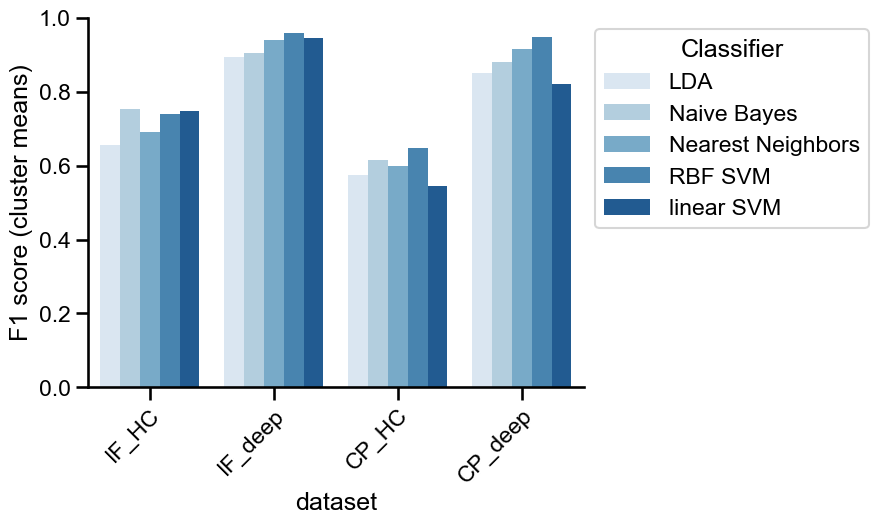

In [16]:
# Plot aesthetics
# Set the style and font
plt.rcParams["font.family"] = "Arial"
sns.set_context('talk')

# Data to plot
y = "F1 Score clusters (mean)" # "F1 Score clusters (mean)", "F1 Score clusters (max)"
order = ['IF_HC', 'IF_deep', 'CP_HC', 'CP_deep']

# Barplot
ax = sns.barplot(data=df, x="dataset", y=y, hue="Classifier", palette="Blues", order=order)

# Plot design
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine()
ax.set_ylim(0, 1)
ax.set_ylabel('F1 score (cluster means)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right', rotation_mode="anchor")

# Saving plot
plt.savefig('Classifier_Leiden_' + y + '.pdf', bbox_inches='tight')

plt.show()

Data loading per dataset

In [17]:
dataset = 'CP' #IF, CP
analysis = 'HC' #HC, deep

df2 = pd.read_csv(f'Data/classification_results_leiden_{dataset}_{analysis}.csv')

# Remove PCA data
df2 = df2[df2['Profile'] != 'pca']

# Change name of category in Profile column
df2['Profile'] = df2['Profile'].str.split('_').str[2].astype(float)

print(df2)

      Classifier  Profile  F1 Score
1     linear SVM     0.10  0.298930
2     linear SVM     0.36  0.566828
3     linear SVM     0.62  0.546128
4     linear SVM     0.87  0.539486
5     linear SVM     1.13  0.574264
..           ...      ...       ...
100  Naive Bayes     3.97  0.642455
101  Naive Bayes     4.23  0.583356
102  Naive Bayes     4.48  0.681099
103  Naive Bayes     4.74  0.601110
104  Naive Bayes     5.00  0.677284

[100 rows x 3 columns]


Plotting

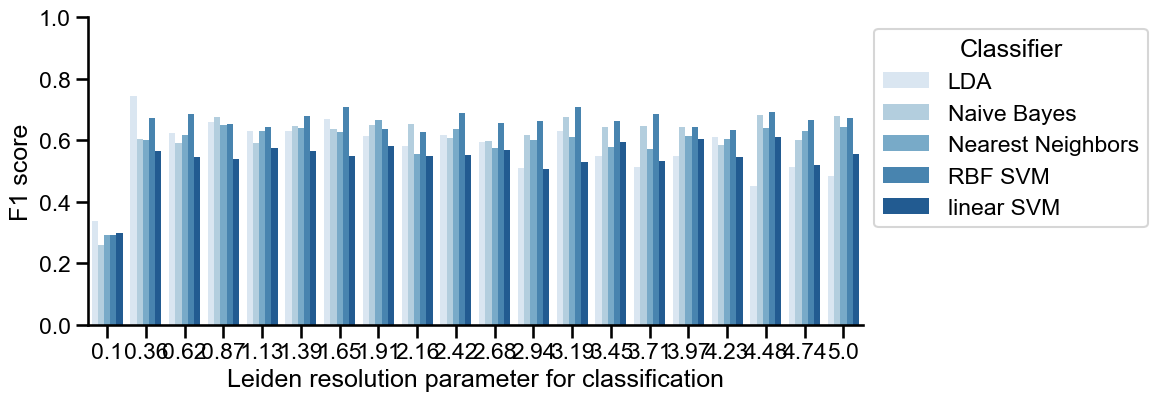

In [18]:
# Plot aesthetics
# Set the style and font
plt.rcParams["font.family"] = "Arial"
sns.set_context('talk')

# Create the plot
plt.figure(figsize=(10, 4))

# Data to plot
y = "F1 Score" # "F1 Score clusters (mean)", "F1 Score clusters (max)"
hue_order = ['LDA', 'Naive Bayes', 'Nearest Neighbors', 'RBF SVM', 'linear SVM']

# Barplot
ax = sns.barplot(data=df2, x="Profile", y=y, hue="Classifier", hue_order=hue_order, palette="Blues")

# Plot design
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine()
ax.set_ylim(0, 1)
ax.set_xlabel('Leiden resolution parameter for classification')
ax.set_ylabel('F1 score')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right', rotation_mode="anchor")

# Saving plot
#plt.savefig('Classifier_Leiden_' + dataset + '_' + analysis + '_' + y + '.pdf', bbox_inches='tight')

plt.show()

Determine most predictive cluster number

In [19]:
result = df2[df2['Profile'] != 'pca'].groupby('Profile')['F1 Score'].mean()
highest_mean = result.max()
best_profile = result.idxmax()
print(f"Highest mean F1 Score: {highest_mean}, Profile: {best_profile}")


Highest mean F1 Score: 0.6379226818746011, Profile: 1.65


Mean of all classifiers per cluster

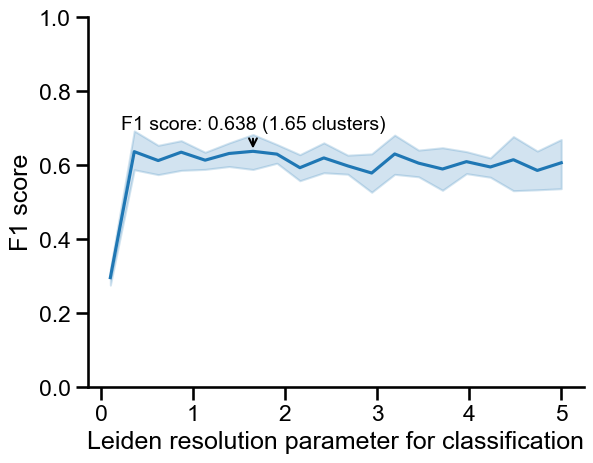

In [20]:
# Plot aesthetics
plt.rcParams["font.family"] = "Arial"
sns.set_context('talk')

# Create the plot
data = df2[df2['Profile'] != 'pca']
y = "F1 Score"

# Line plot
ax = sns.lineplot(data=data, x="Profile", y=y)

# Annotate the highest mean F1 Score and cluster number
ax.annotate(f'F1 score: {highest_mean:.3f} ({best_profile} clusters)',
            xy=(best_profile, highest_mean),
            xytext=(best_profile, highest_mean + 0.06),
            ha='center',
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=14, color='black')

# Plot design
sns.despine()
ax.set_ylim(0, 1)
ax.set_xlabel('Leiden resolution parameter for classification')
ax.set_ylabel('F1 score')

# Save the plot
#plt.savefig('Classifier_Means_Leiden_' + dataset + '_' + analysis + '_' + y + '.pdf', bbox_inches='tight')
plt.show()


Plot all datasets together

     Dataset  Profile         Classifier  F1 Score
0      CP_HC      0.1                LDA  0.337032
1      CP_HC      0.1        Naive Bayes  0.260546
2      CP_HC      0.1  Nearest Neighbors  0.291224
3      CP_HC      0.1            RBF SVM  0.292724
4      CP_HC      0.1         linear SVM  0.298930
..       ...      ...                ...       ...
395  IF_deep      5.0                LDA  0.673614
396  IF_deep      5.0        Naive Bayes  0.892344
397  IF_deep      5.0  Nearest Neighbors  0.937500
398  IF_deep      5.0            RBF SVM  0.993043
399  IF_deep      5.0         linear SVM  0.979057

[400 rows x 4 columns]


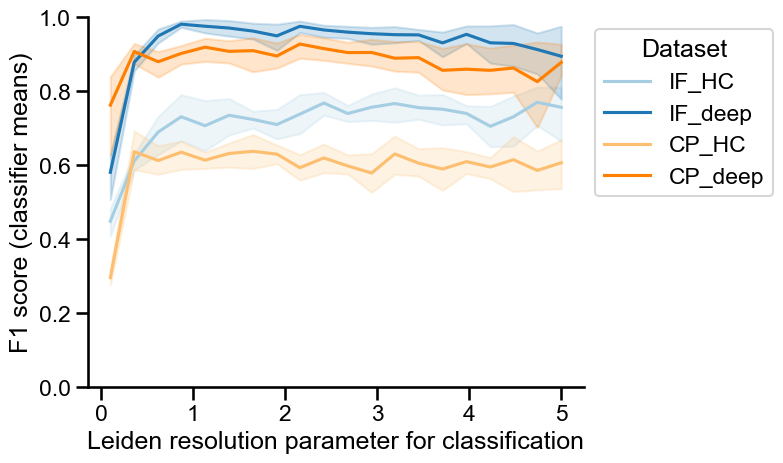

In [21]:
# Load all data
df_IF_HC = pd.read_csv('Data/classification_results_leiden_IF_HC.csv')
df_IF_deep = pd.read_csv('Data/classification_results_leiden_IF_deep.csv')
df_CP_HC = pd.read_csv('Data/classification_results_leiden_CP_HC.csv')
df_CP_deep = pd.read_csv('Data/classification_results_leiden_CP_deep.csv')


# Create dataset column
df_IF_HC['Dataset'] = 'IF_HC'
df_IF_deep['Dataset'] = 'IF_deep'
df_CP_HC['Dataset'] = 'CP_HC'
df_CP_deep['Dataset'] = 'CP_deep'

# Merge all DataFrames
merged_df = pd.concat([df_IF_HC, df_IF_deep, df_CP_HC, df_CP_deep], ignore_index=True)

# Remove PCA data and group
merged_df = (
    merged_df[merged_df['Profile'] != 'pca']
    .groupby(['Dataset', 'Profile', 'Classifier'])['F1 Score']
    .mean()
    .reset_index()
    )

# Change name of category in Profile column
merged_df['Profile'] = merged_df['Profile'].str.split('_').str[2].astype(float)

print(merged_df)

# Plot aesthetics
plt.rcParams["font.family"] = "Arial"
sns.set_context('talk')

# Get useful colors
paired_colors = sns.color_palette("Paired", 12)
# Choose custom colors
custom_colors = [paired_colors[0], paired_colors[1], paired_colors[6], paired_colors[7]]

# Create the plot
data = merged_df
y = "F1 Score"
hue_order = ['IF_HC', 'IF_deep', 'CP_HC', 'CP_deep']

# Line plot
ax = sns.lineplot(data=data, x="Profile", hue='Dataset', y=y, hue_order=hue_order, palette=custom_colors)

# Plot design
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine()
ax.set_ylim(0, 1)
ax.set_xlabel('Leiden resolution parameter for classification')
ax.set_ylabel('F1 score (classifier means)')

# Save the plot
plt.savefig('Classifier_Means_Leiden_AllDatasets.pdf', bbox_inches='tight')
plt.show()